In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import optimize
plt.style.use('science')

# Linear Least Squares Fit

For a set of $(x_i, y_i)$ data points, we aim to find the best $f(x_i) = mx_i + b$ that fits our data.

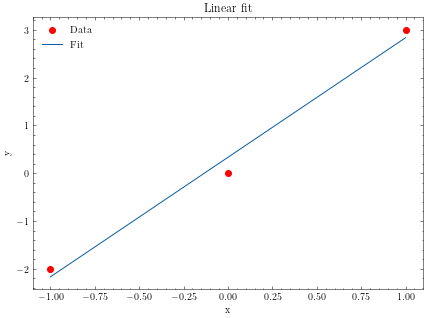

In [7]:
# Generating a small set of data points
data = np.array([[-1,-2], [0,0], [1,3]])
x = data[:,0]
y = data[:,1]

m, b = np.polyfit(x,y,1) # Coordinates and degree
f = m*x + b

# Plotting
plt.figure(figsize=(7,5))
plt.title('Linear fit')
plt.plot(x,y, marker='o', linestyle='none',c='r', label='Data')
plt.plot(x, f, label='Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

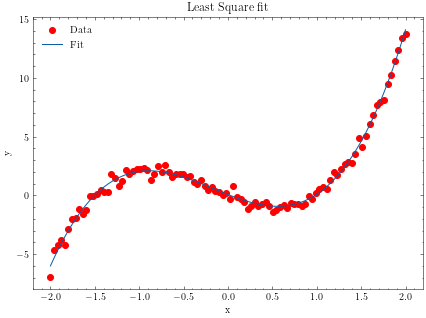

In [16]:
# A second example: trying to fit a cubic function with some error

x = np.linspace(-2, 2,100)
y = 2*x**3 + x**2 - 3*x
error = 0.4 * np.random.randn(100)
y = y + error

a,b,c,d = np.polyfit(x,y,3)
f = a*x**3 + b*x**2 + c*x + d

plt.figure(figsize=(7,5))
plt.title('Least Square fit')
plt.plot(x,y, marker='o', linestyle='none', c='r', label='Data')
plt.plot(x, f, label='Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Euler Method

Euler's method can be used for solving differential equations of the form

$$\frac{dx(t)}{dt} = f(x,t), \, with \, x(t_0) = x_0.$$

Recall the Taylor expansion for $x(t)$:

$$x(t + h) = x(t) + h \, x'(t)  = x(t) + h \, f(x,t)$$

In [17]:
# Lets solve dx/dt = cos(t) with x(0) = 0.

x0 = 0
h = 0.1
t_values = np.arange(0, 2*np.pi, h)

def f(t):
    return np.cos(t)

x = x0
x_values = []

for t in t_values:
    x_values.append(x)
    x = x + h * f(t)
    

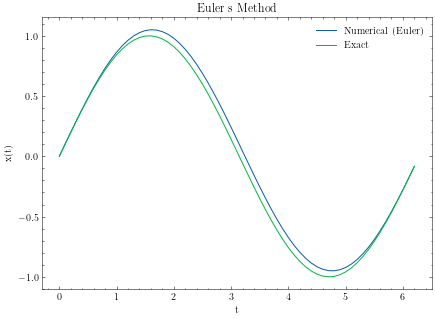

In [18]:
plt.figure(figsize=(7,5))
plt.title('Euler s Method')
plt.plot(t_values, x_values, label='Numerical (Euler)')
plt.plot(t_values, np.sin(t_values), label='Exact')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.show()

# Simultaneous 1st Order ODEs

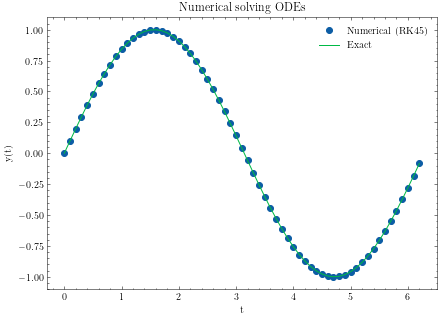

In [23]:
# Now we're using an out-of-the-box ode solver that uses RK4. Let's solve our previous example again.

y0 = 0
h = 0.1
t_values = np.arange(0, 2*np.pi, h)

def f(t, y):
    return np.cos(t)


sol = integrate.solve_ivp(f, (0, 2*np.pi), [y0], t_eval=t_values)
y = sol.y[0]

plt.figure(figsize=(7,5))
plt.title('Numerical solving ODEs')
plt.plot(t_values, y,'o' ,label='Numerical (RK45)')
plt.plot(t_values, np.sin(t_values), label='Exact')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()

Now, lets solve these coupled ODEs:

$$\frac{dx}{dt} = \cos(y)$$
$$\frac{dy}{dt} = \sin(x)$$

with $x(0) = y(0) = 1$

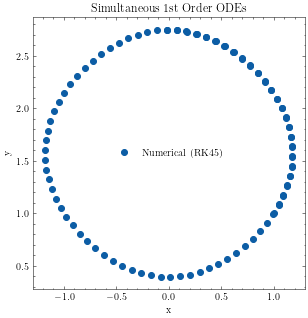

In [24]:
# We can also solve simultaneous 1st order ODEs

def f(t, r):
    x, y = r
    fx = np.cos(y)
    fy = np.sin(x)
    return fx, fy

r0 = [1, 1]

sol = integrate.solve_ivp(f, (0, 10), r0, t_eval=np.linspace(0, 10, 100))
x = sol.y[0]
y = sol.y[1]

plt.figure(figsize=(7,5))
plt.title('Simultaneous 1st Order ODEs')
plt.plot(x, y,'o' ,label='Numerical (RK45)')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('scaled')
plt.legend()
plt.show()

Our next example is a SIR model. Our model only contains Susceptible, Infected and Recovered people. We assume their rate of change is:

$$ \frac{dS}{dt} = -a \, S \,I$$
$$ \frac{dI}{dt} = +a \, S \,I - b \, I$$
$$ \frac{dR}{dt} = b \, I$$


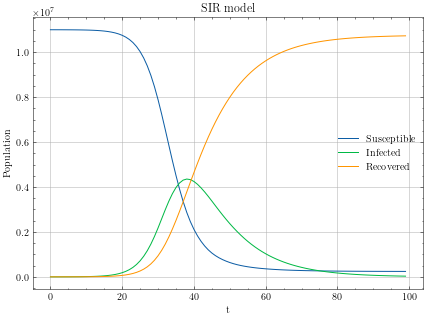

In [26]:
def f(t, y, beta, gamma, N):
    S, I, R = y
    a = beta/N
    b = gamma
    fS = -a*S*I
    fI = +a*S*I - b*I
    fR = +b*I
    return [fS, fI, fR]

N = 1.1e7 # Population size
I0 = 574 # Initial infected people
beta = 0.39 # Controls the transmission rate
gamma = 0.1 # Controls the recovery rate
init_conditions = [N - I0, I0, 0] # Initial conditions S0, I0, R0

sol = integrate.solve_ivp(f, (0, 100), init_conditions, t_eval=np.arange(0, 100, 1), args=(beta, gamma, N))
S = sol.y[0]
I = sol.y[1]
R = sol.y[2]
t = sol.t

plt.figure(figsize=(7,5))
plt.title('SIR model')
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('t')
plt.ylabel('Population')
plt.grid()
plt.legend()
plt.show()

# Root finding

## Binary search

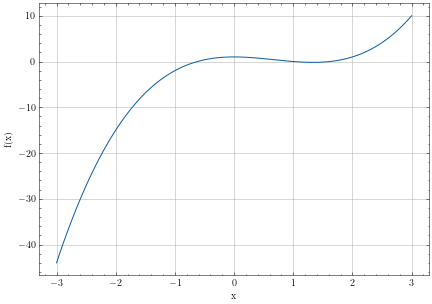

In [29]:
def f(x):
    """ Our polynomial that we aim to find the roots."""
    return x**3 - 2*x**2 + 1

x = np.linspace(-3,3,100)

plt.figure(figsize=(7,5))
plt.plot(x,f(x))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()

In [30]:
# There is a root around -0.6. Pick two points where f(x) is positive and negative
x1 = -1 
x2 = 0

for i in range(50):
    x_mid = (x1 + x2)/2 #Find a midpoint
    if np.sign(f(x_mid)) == np.sign(f(x1)):
        x1 = x_mid
    else:
        x2 = x_mid
    if x2 - x1 < 1e-8:
        print(f'Root found: {x_mid} after {i+1} iterations')
        break
else:
    print('Convergence failed.')

Root found: -0.6180339828133583 after 27 iterations


In [31]:
# Scipy version

root = optimize.bisect(f, x1, x2)
print(f' The root is {root}')

 The root is -0.6180339887487207


## Newton-Raphson / Secant Method

In [32]:
def f(x):
    """ Our polynomial that we aim to find the roots."""
    return x**3 - 2*x**2 + 1

def dfdx(x):
    """ Derivative of our polynomial."""
    return 3*x**2 - 4*x


x = np.linspace(-3,3,100)
x = -1

for i in range(5):
    x_last = x
    x = x - f(x)/dfdx(x)
    if abs(x - x_last) < 1e-8:
        print(f'Root found: {x} after {i+1} iterations')
        break
else:
    print('Convergence failed.')


Root found: -0.6180339887498949 after 5 iterations


In [33]:
# Creating a function    
    
def newton(f, dfdx, x, steps=50, tol=1e-8):
    for i in range(steps):
        x_last = x
        x = x - f(x)/dfdx(x)
        if abs(x - x_last) < 1e-8:
            break
    else:
        x = 'Not Found'
    return x

newton(f, dfdx, -1, 5)

-0.6180339887498949

In [34]:
# Scipy version. If f'(x) isn't provided, its called secant method.

root = optimize.newton(f, -1)
print(f' The root is {root}')


 The root is -0.6180339887498948


# Numerical Differentiation

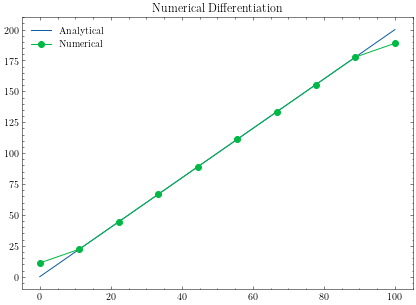

In [45]:
h = 10
x = np.linspace(0,100,h) # Ideally h should be order 1e-5
y = x**2

plt.figure(figsize=(7,5))
plt.title('Numerical Differentiation')
dydx = np.gradient(y,x)
plt.plot(x,2*x, label='Analytical')
plt.plot(x,dydx, marker='o', label='Numerical')
plt.legend()
plt.show()